In [28]:
import keras
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

2.15.0


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
print(np.__version__)

1.25.2


In [31]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [32]:
X_train = []
y_train = []
image_size = 150
labels = ['Tomato___Bacterial_spot',
          'Tomato___Early_blight',
          'Tomato___healthy',
          'Tomato___Late_blight',
          'Tomato___Leaf_Mold',
          'Tomato___Septoria_leaf_spot',
          'Tomato___Target_Spot',
          'Tomato___Tomato_mosaic_virus',
          'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
          'Tomato___Spider_mites Two-spotted_spider_mite']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/train',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [33]:
X_test=[]
y_test=[]

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/val',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [34]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [35]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
15/15 [==============================] - 5s 129ms/step - loss: 4.9150 - accuracy: 0.1250 - val_loss: 2.4267 - val_accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 2s 102ms/step - loss: 2.2152 - accuracy: 0.2069 - val_loss: 2.8181 - val_accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 1s 97ms/step - loss: 2.1774 - accuracy: 0.2134 - val_loss: 3.0030 - val_accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 1s 99ms/step - loss: 2.1752 - accuracy: 0.2112 - val_loss: 3.0846 - val_accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 1s 96ms/step - loss: 2.1725 - accuracy: 0.2112 - val_loss: 2.9630 - val_accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 1s 96ms/step - loss: 2.1636 - accuracy: 0.2112 - val_loss: 2.9681 - val_accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 1s 99ms/step - loss: 2.1632 - accuracy: 0.2112 - val_loss: 2.9742 - val_accu

In [39]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 1s 20ms/step - loss: 3.9720 - accuracy: 0.3386


[3.972041606903076, 0.3386138677597046]

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

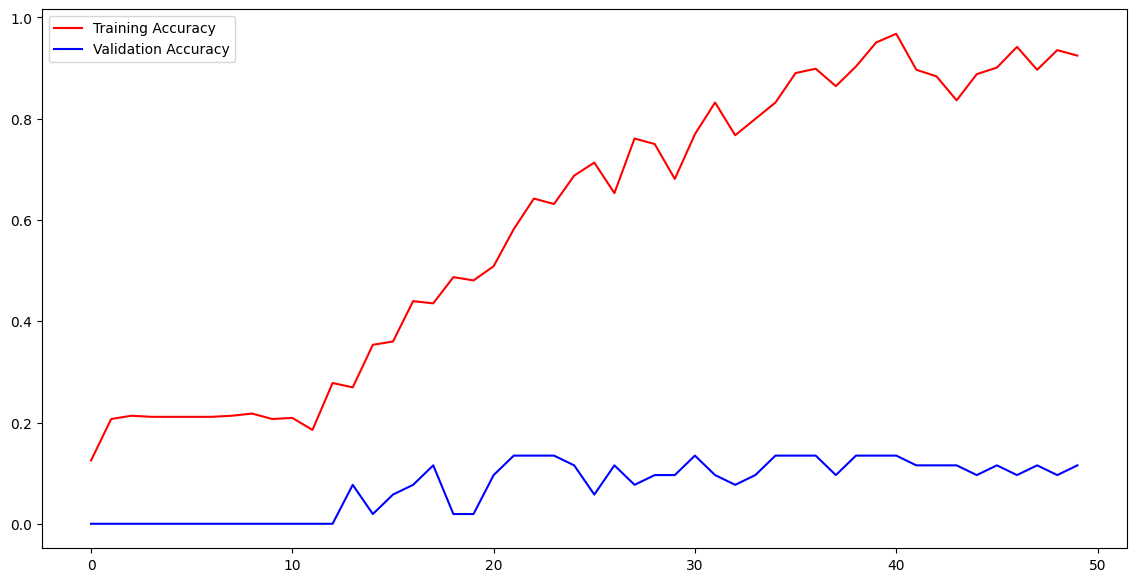

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

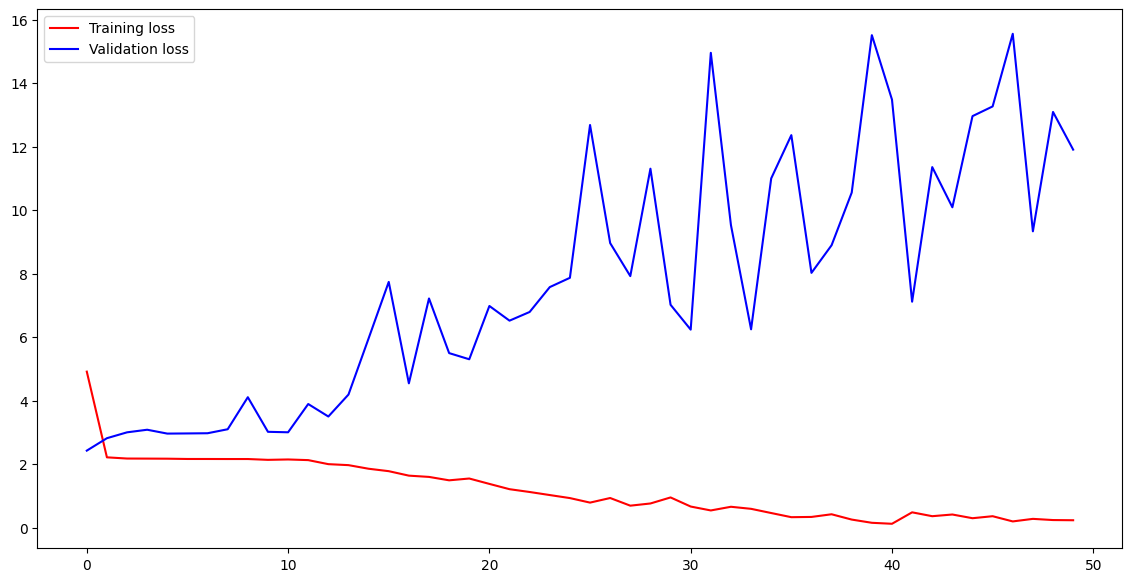

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()